#**CARDIOVASCULAR RISK PREDICTION (CHD)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=pd.read_csv('/content/data_cardiovascular_risk.csv')


In [ ]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


<Axes: >

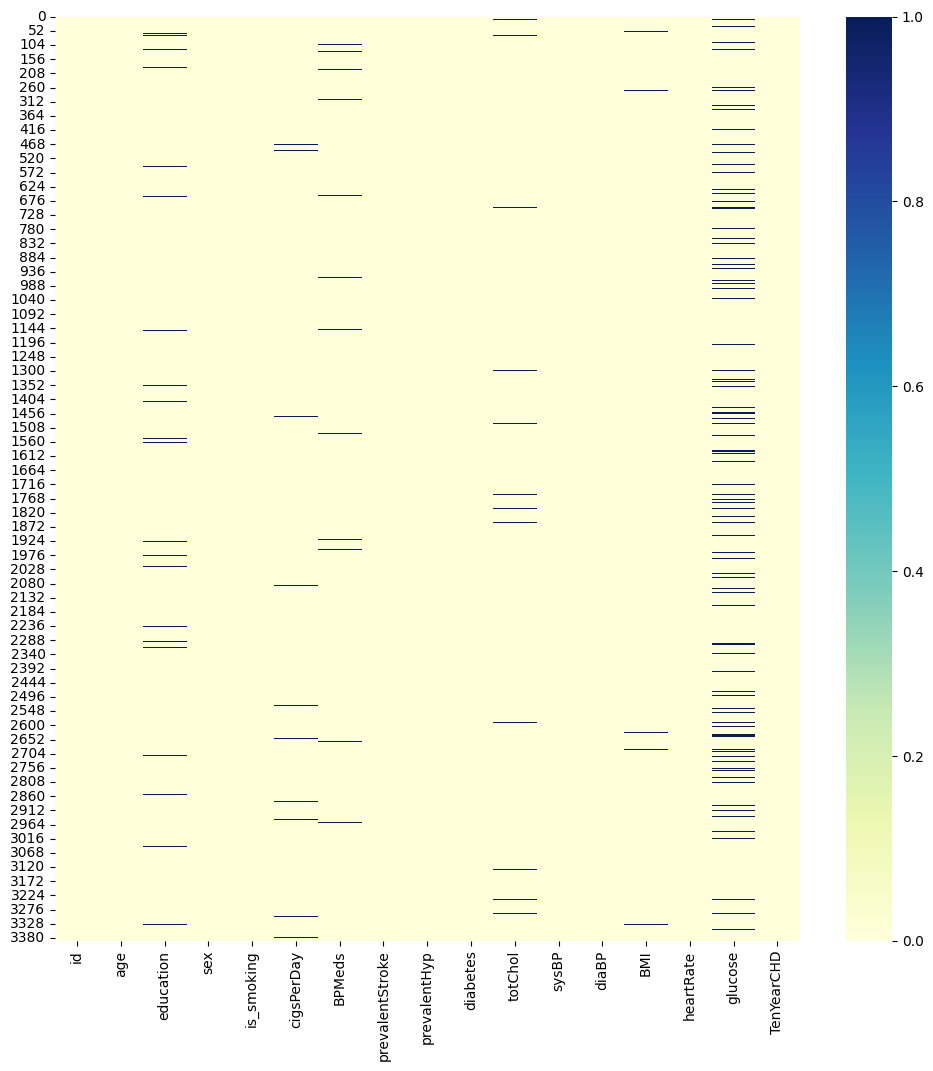

In [ ]:
missing_values=df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(missing_values,cmap="YlGnBu")

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

<Axes: >

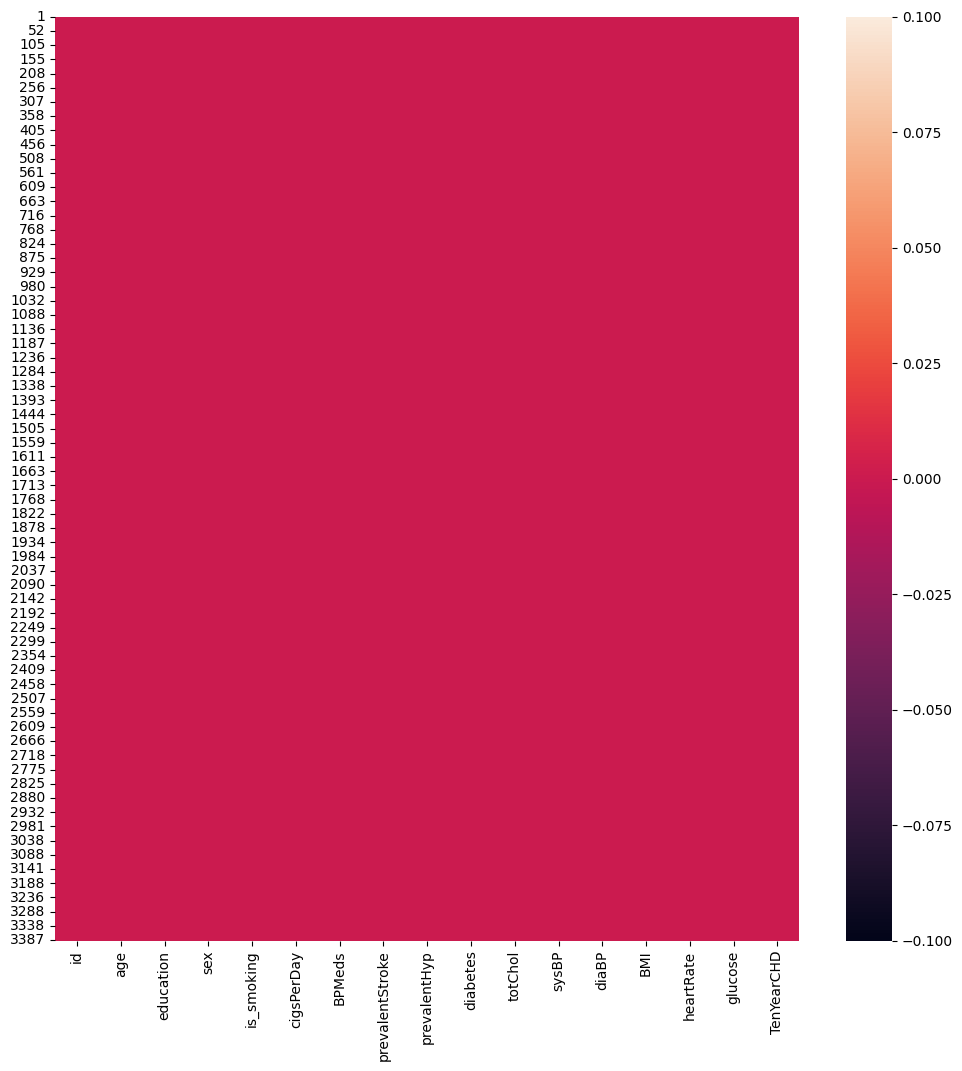

In [ ]:
missing_values=df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

<Axes: >

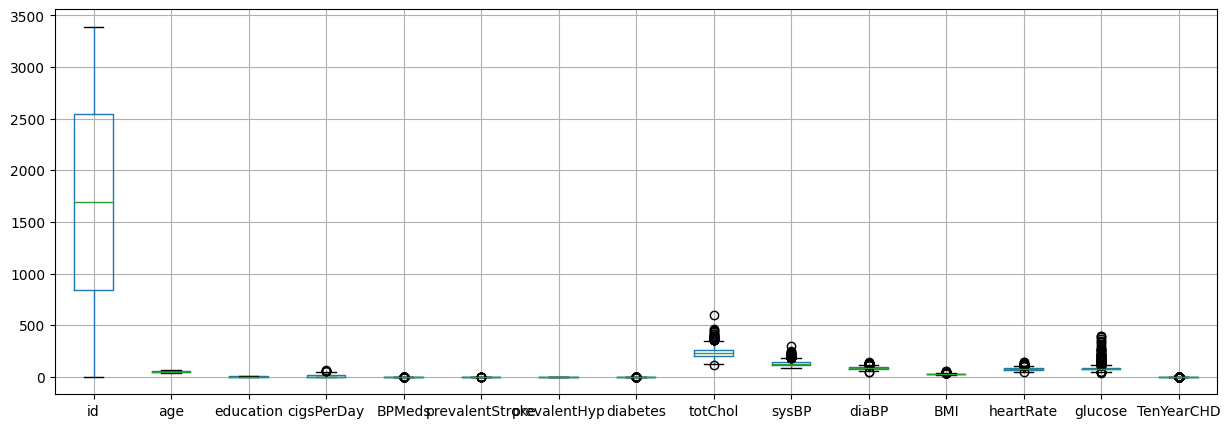

In [ ]:
plt.figure(figsize=(15,5))
df.boxplot()

<ipython-input-12-f807a73b1b9f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correleation=df.corr()


<Axes: >

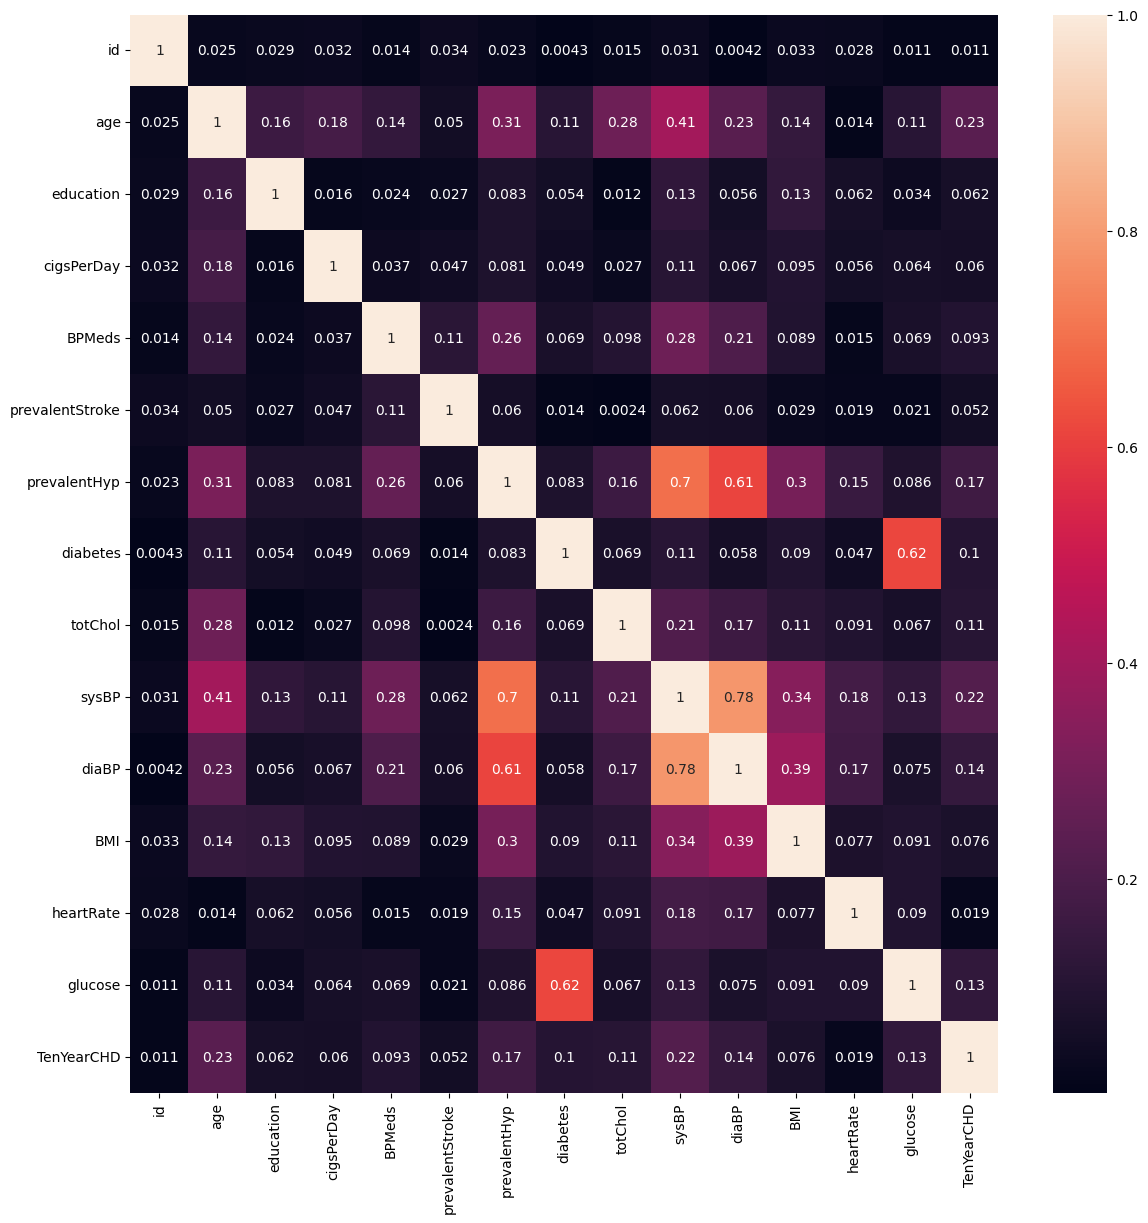

In [ ]:
plt.figure(figsize=(14,14))
correleation=df.corr()
sns.heatmap(abs(correleation),annot=True)

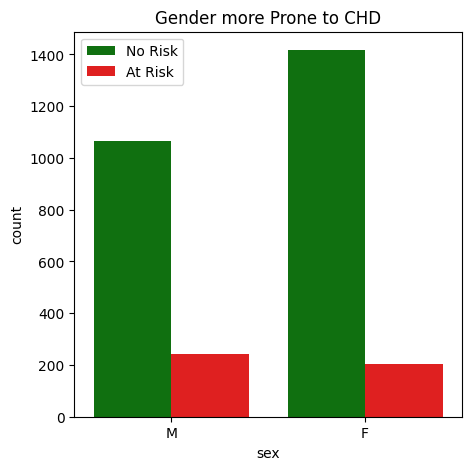

In [ ]:
my_palette={0 : 'g' , 1 : 'r'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Gender more Prone to CHD")
plt.legend(['No Risk', 'At Risk'])
plt.show()

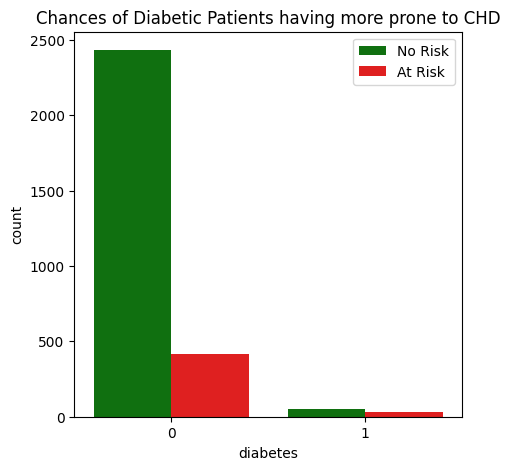

In [ ]:
my_palette={0 : 'g' , 1 : 'r'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Chances of Diabetic Patients having more prone to CHD")
plt.legend(['No Risk', 'At Risk'])
plt.show()

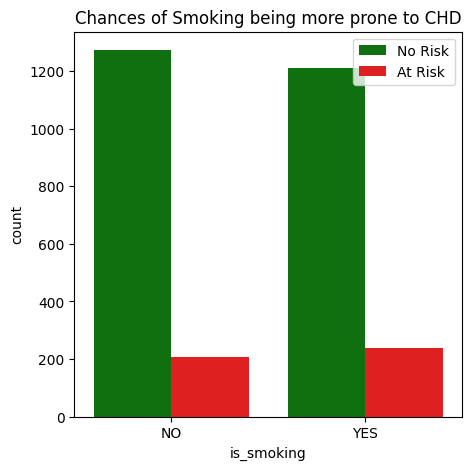

In [ ]:
my_palette={0 : 'g' , 1 : 'r'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['is_smoking'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Chances of Smoking being more prone to CHD")
plt.legend(['No Risk', 'At Risk'])
plt.show()

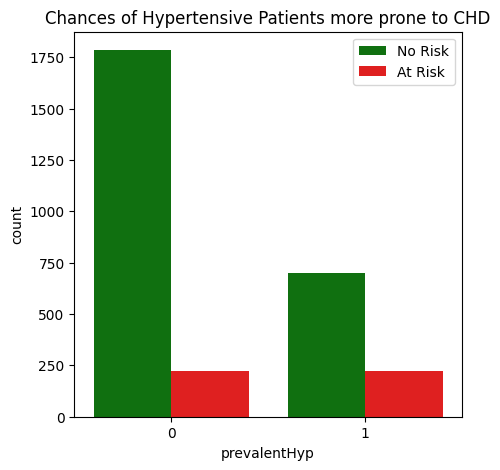

In [ ]:
my_palette={0 : 'g' , 1 : 'r'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Chances of Hypertensive Patients more prone to CHD")
plt.legend(['No Risk', 'At Risk'])
plt.show()

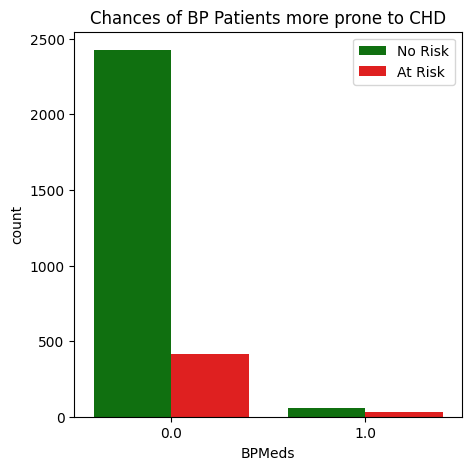

In [ ]:
my_palette={0 : 'g' , 1 : 'r'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Chances of BP Patients more prone to CHD")
plt.legend(['No Risk', 'At Risk'])
plt.show()

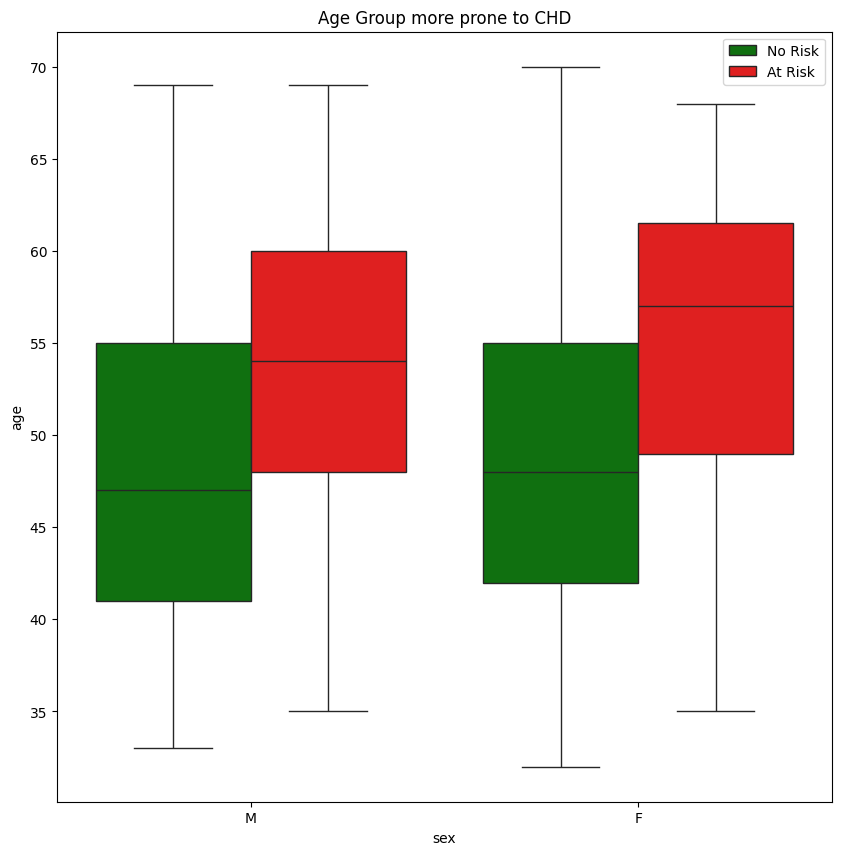

In [ ]:
my_palette = {0 : 'g' , 1 : 'r'}
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Age Group more prone to CHD")
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles,['No Risk','At Risk'], loc='best')
plt.show()

<ipython-input-19-07f35adc20da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='Set1')


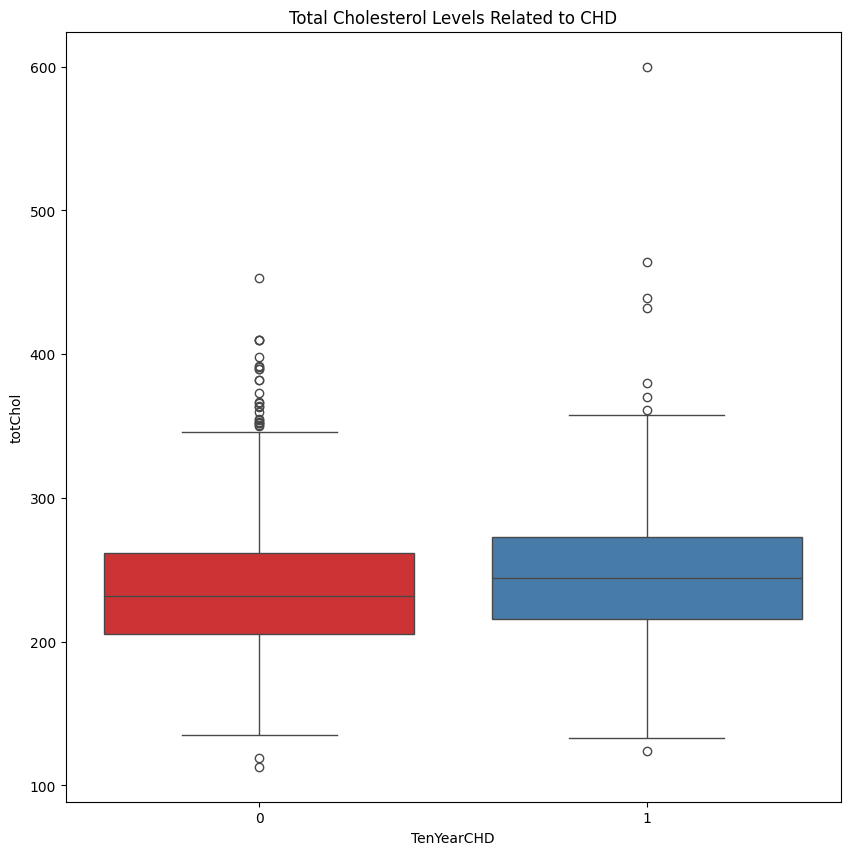

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='Set1')
plt.title("Total Cholesterol Levels Related to CHD")
plt.show()

In [ ]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    return value

In [ ]:
df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)

In [ ]:
df['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of 1       Normal
2       Normal
3       Normal
4       Normal
5       Normal
         ...  
3384      High
3385    Normal
3386    Normal
3387    Normal
3389    Normal
Name: heartRateLabel, Length: 2927, dtype: object>

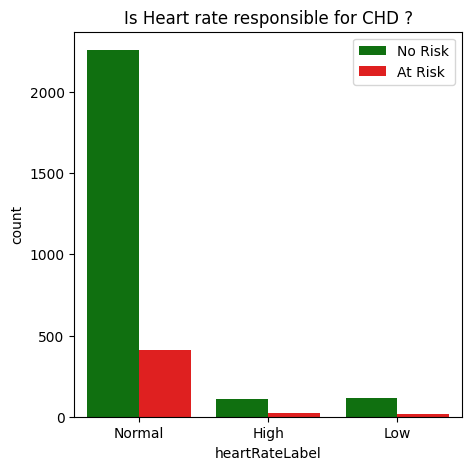

In [ ]:
plt.figure(figsize = (5,5))
my_palette={0 : 'g' , 1 : 'r'}
sns.countplot(x = df['heartRateLabel'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate responsible for CHD ?")
plt.legend(['No Risk', 'At Risk'])
plt.show()

In [ ]:
df.drop(columns=['heartRateLabel'], inplace=True)

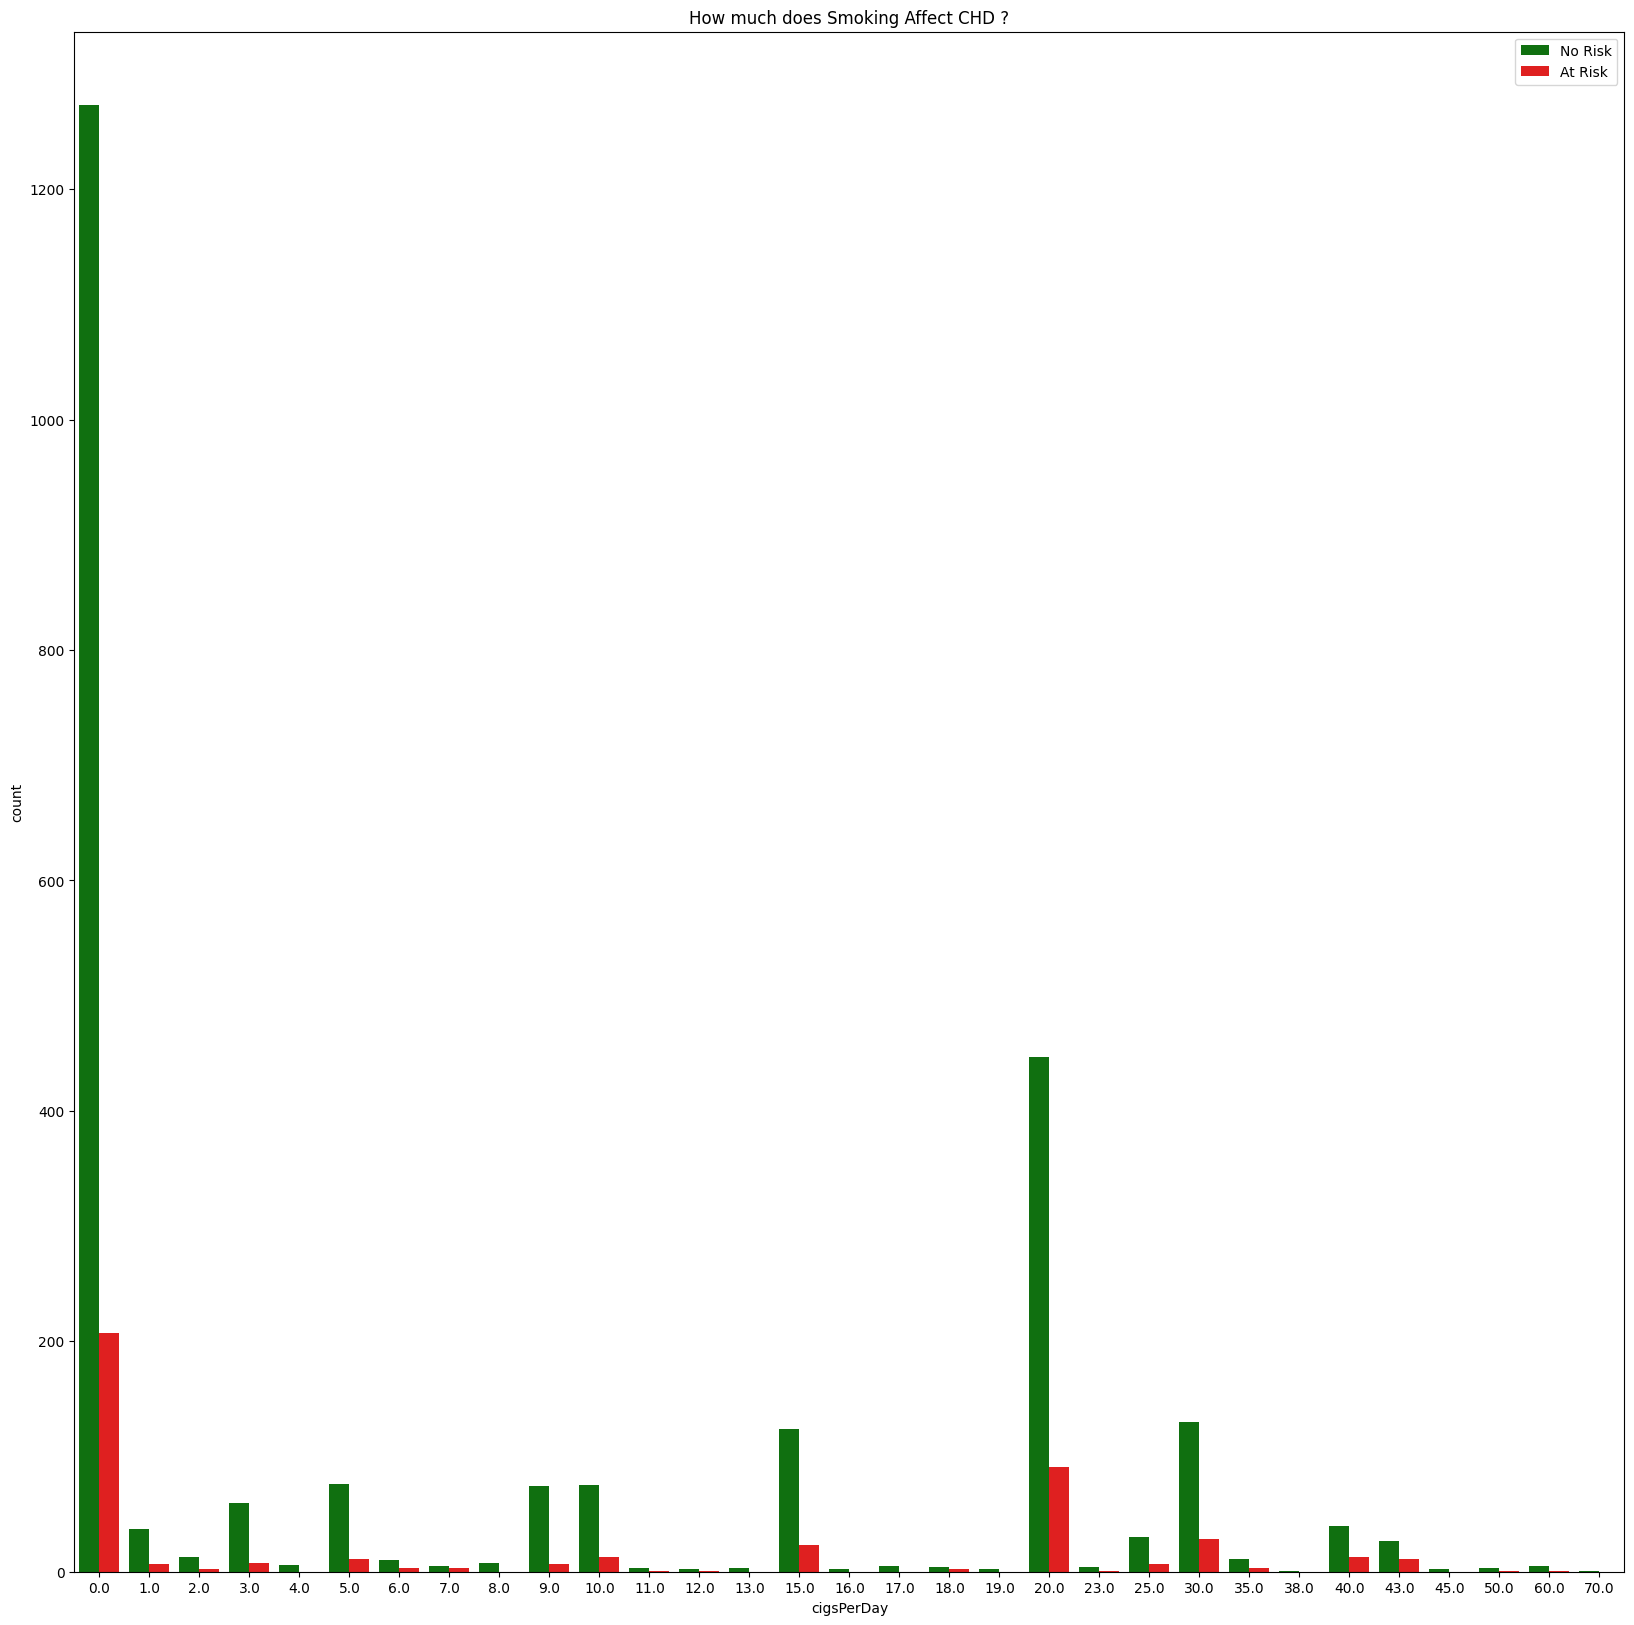

In [ ]:
plt.figure(figsize = (20,20))
sns.countplot(x = df['cigsPerDay'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("How much does Smoking Affect CHD ?")
plt.legend(['No Risk', 'At Risk'])
plt.show()

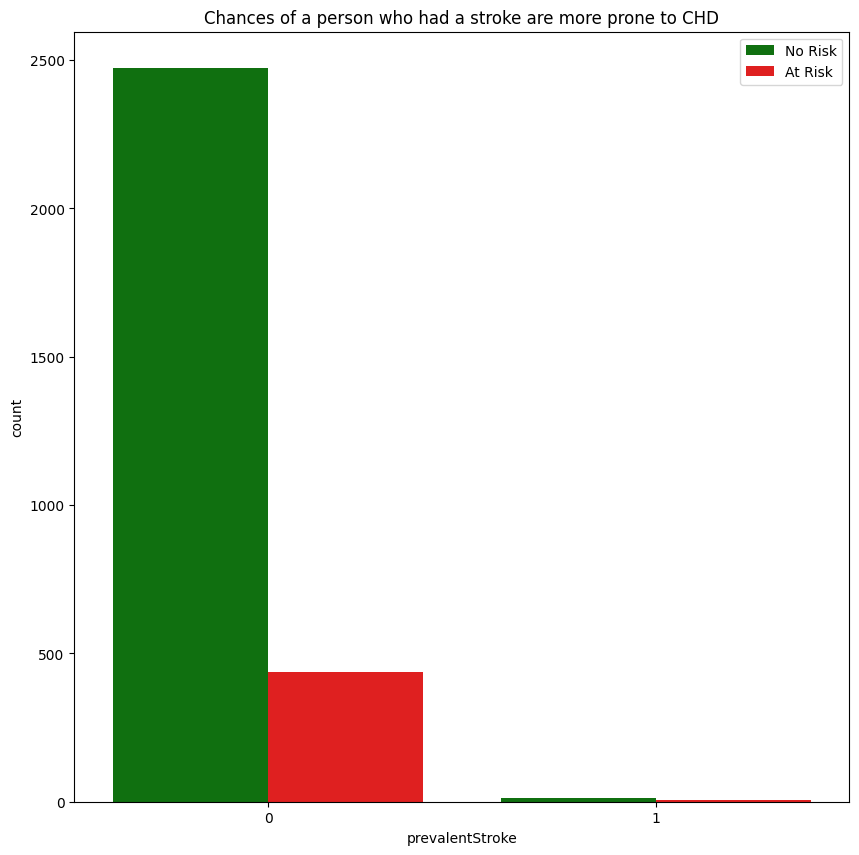

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Chances of a person who had a stroke are more prone to CHD")
plt.legend(['No Risk', 'At Risk'])
plt.show()

<ipython-input-27-7e9b76278b3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['TenYearCHD'], y=df['sysBP'],palette='Set1')


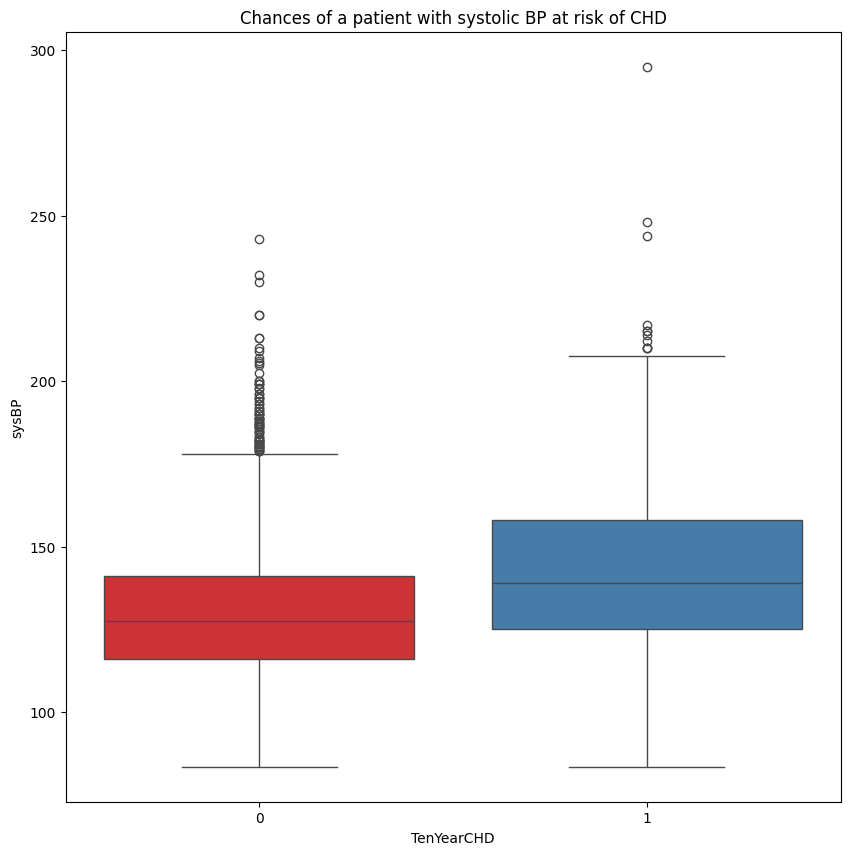

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(x=df['TenYearCHD'], y=df['sysBP'],palette='Set1')
plt.title("Chances of a patient with systolic BP at risk of CHD")
plt.show()

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


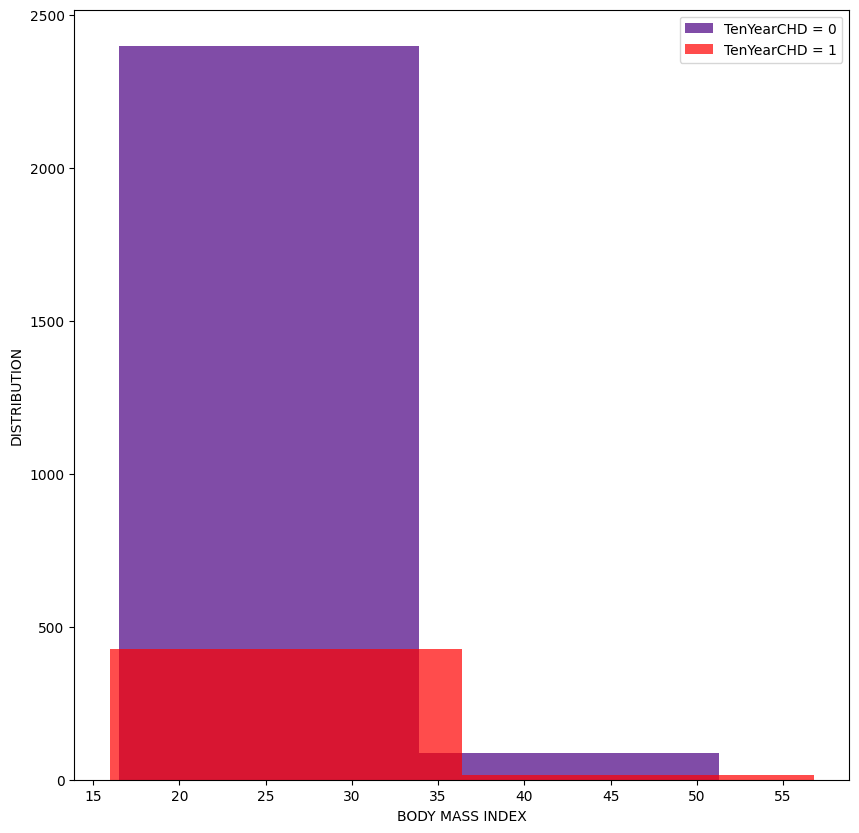

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df['BMI'][df['TenYearCHD'] == 0], bins=2, alpha = 0.7, color='indigo', label = 'TenYearCHD = 0')
plt.hist(df['BMI'][df['TenYearCHD'] == 1], bins=2, alpha = 0.7, color='red', label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('BODY MASS INDEX')
plt.legend()

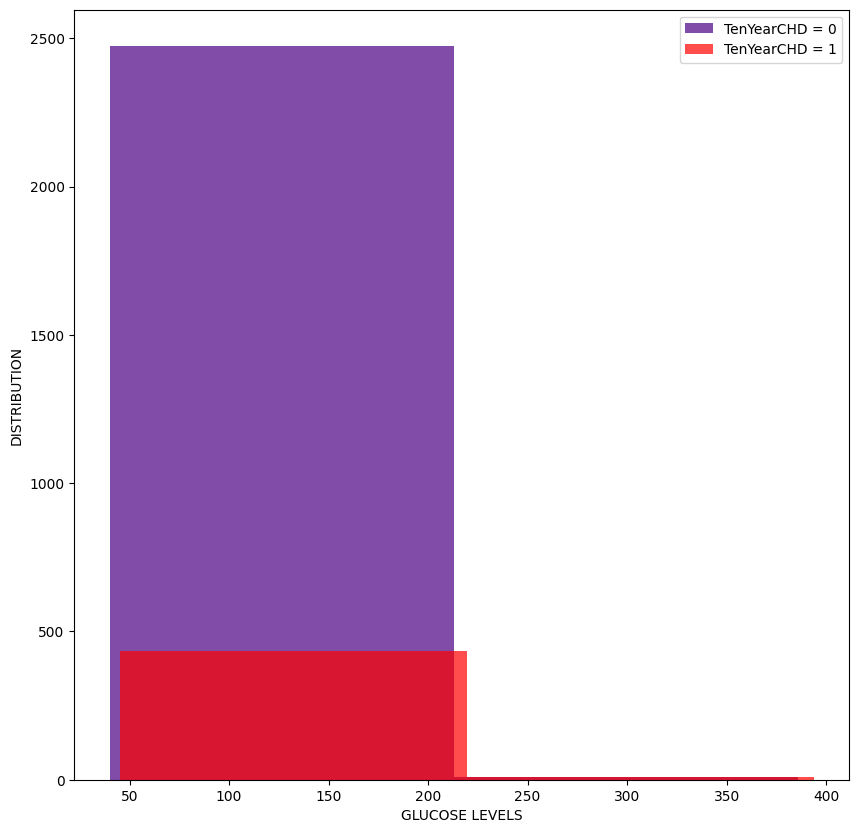

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df['glucose'][df['TenYearCHD'] == 0], bins=2, alpha = 0.7, color='indigo', label = 'TenYearCHD = 0')
plt.hist(df['glucose'][df['TenYearCHD'] == 1], bins=2, alpha = 0.7, color='red', label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('GLUCOSE LEVELS')
plt.legend()

In [ ]:
def blood_pressure_classification(SysBP, DiaBP):
   if (SysBP < 90) or (DiaBP < 60):
     return 0
   if (SysBP < 120) and (DiaBP < 80):
     return 1
   if (SysBP < 130) or (DiaBP < 86):
     return 2
   if (SysBP < 140) or (DiaBP < 90):
     return 3
   if (SysBP < 140) and (DiaBP < 90):
     return 4
   if (SysBP < 160) or (DiaBP < 100):
     return 5
   if (SysBP < 180) or (DiaBP < 110):
     return 6
   return 7

In [ ]:
df['Hypertension'] = df.apply(lambda x: blood_pressure_classification(x['sysBP'],x['diaBP']),axis=1)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7


In [ ]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1
  if glucose < 125:
    return 2
  if glucose < 200:
    return 3
  if glucose < 400:
    return 4
  return 5

In [ ]:
df['Diabetes'] = df['glucose'].apply(lambda x: diabetes_grade(x))
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7,1


In [ ]:
df['SmokingFactor'] = df['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes,SmokingFactor
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1,0.000000
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1,2.302585
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1,2.995732
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1,3.401197
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7,1,0.000000


In [ ]:
df.drop(columns=['prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking', 'cigsPerDay'], inplace=True)

<ipython-input-37-2f8aa4cf6a2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

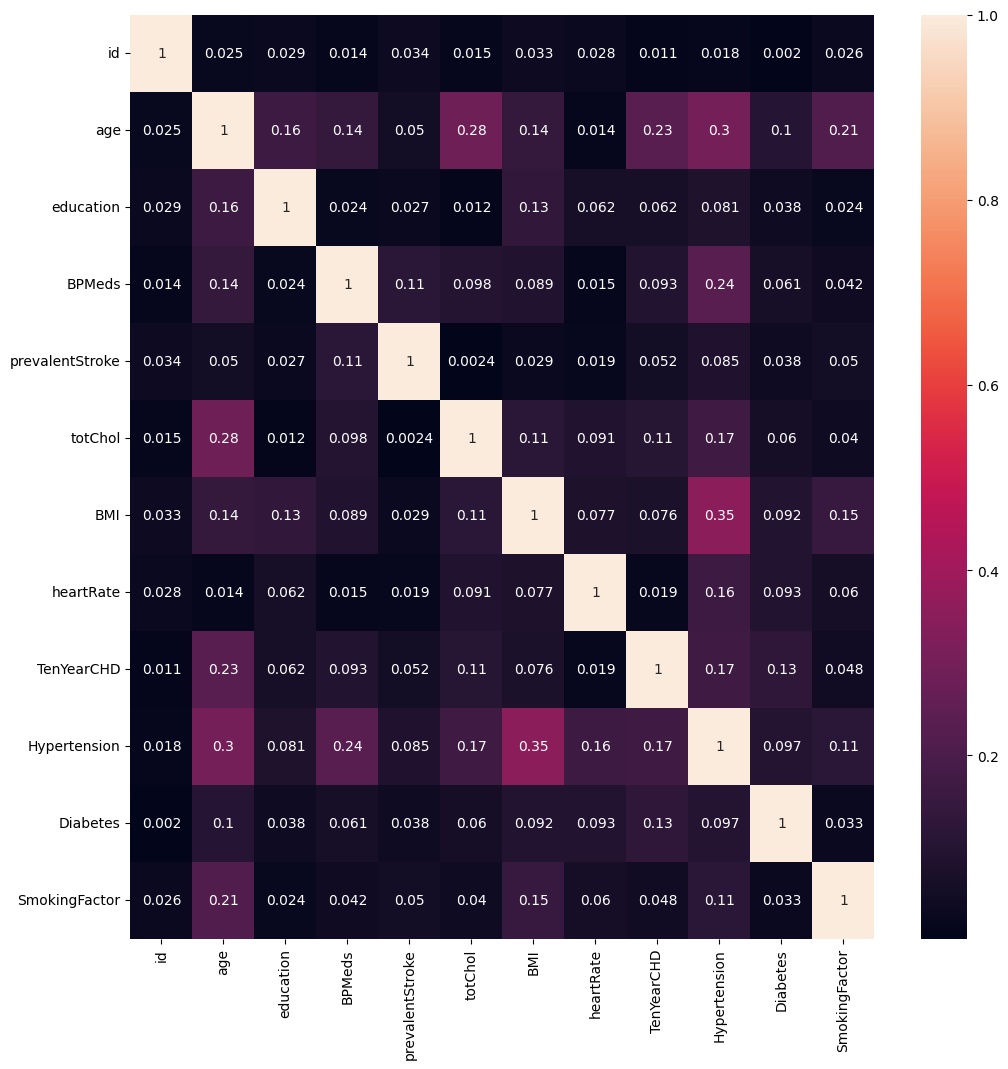

In [ ]:
plt.figure(figsize=(12,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

<ipython-input-38-60bde500c8bb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


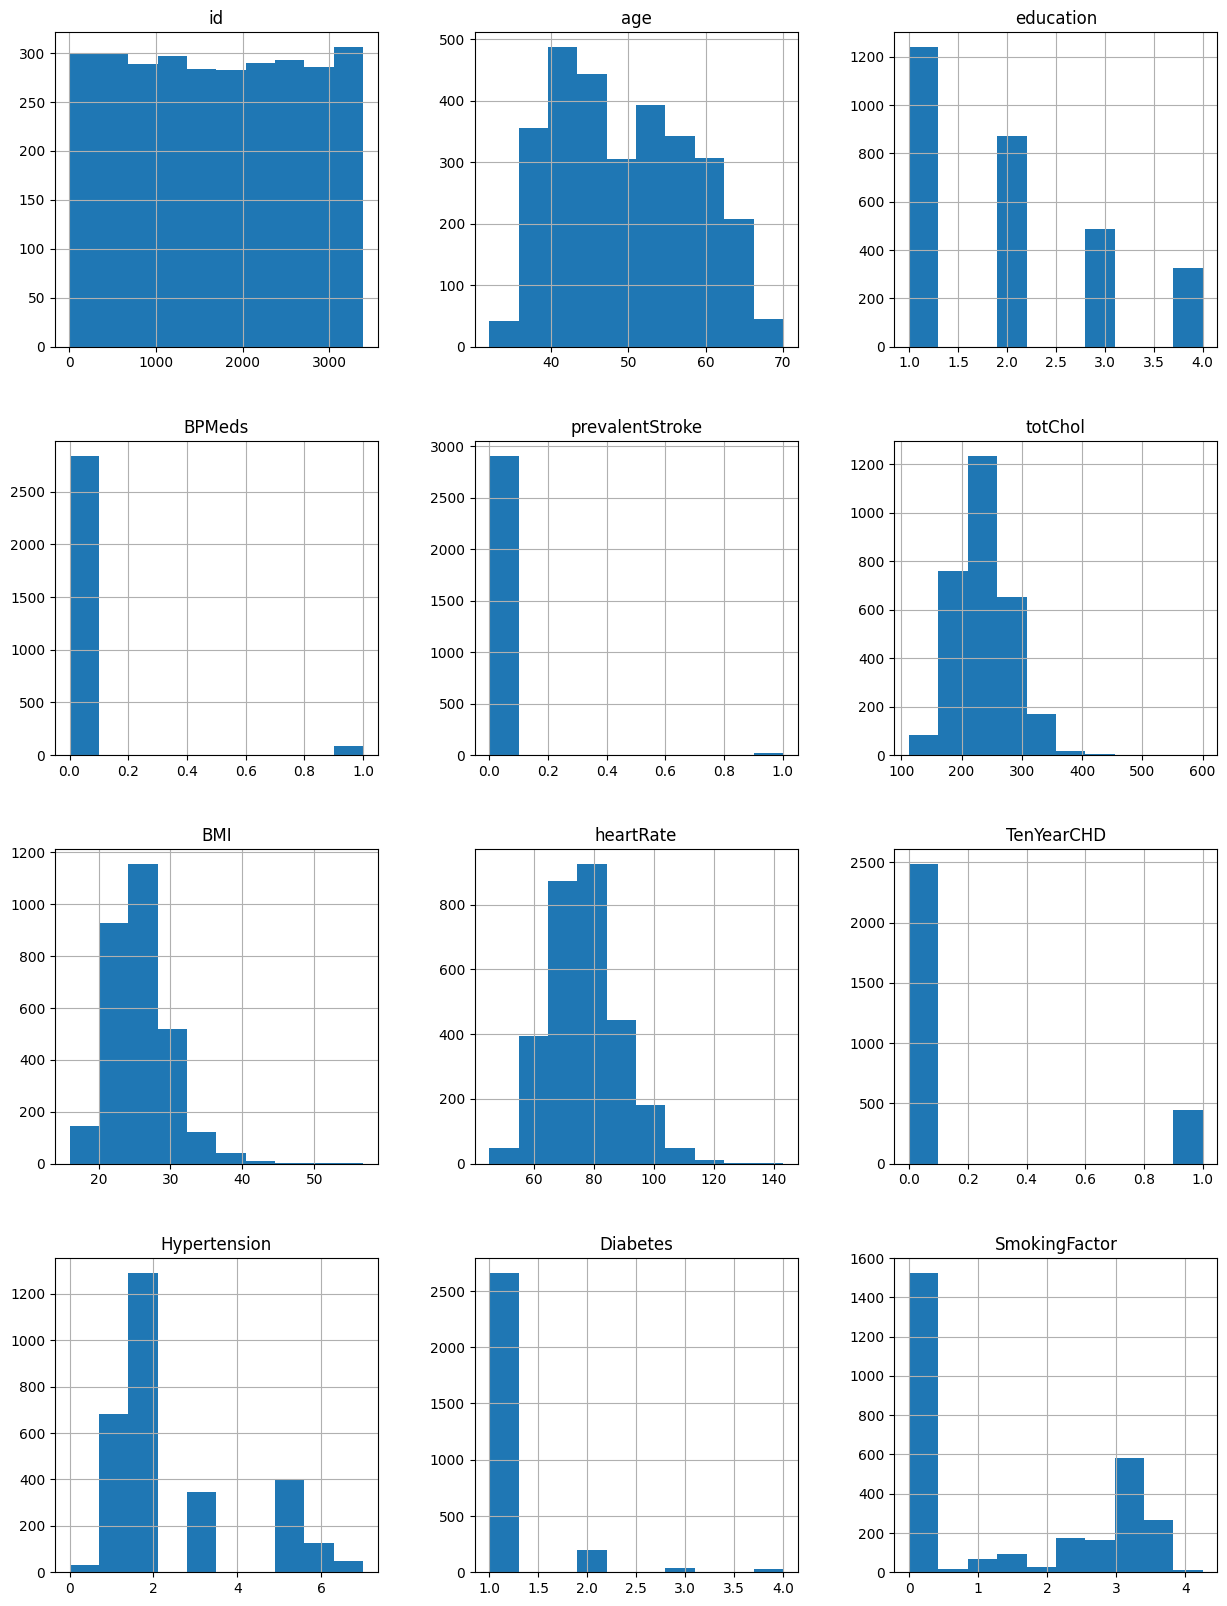

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [ ]:
df.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2927 non-null   int64  
 1   age            2927 non-null   int64  
 2   education      2927 non-null   float64
 3   sex            2927 non-null   object 
 4   totChol        2927 non-null   float64
 5   BMI            2927 non-null   float64
 6   heartRate      2927 non-null   float64
 7   TenYearCHD     2927 non-null   int64  
 8   Hypertension   2927 non-null   int64  
 9   Diabetes       2927 non-null   int64  
 10  SmokingFactor  2927 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 274.4+ KB


In [ ]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)

In [ ]:
df.head()

,id,age,education,sex,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes,SmokingFactor
1,1,36,4.0,1,212.0,29.77,72.0,0,5,1,0.000000
2,2,46,1.0,0,250.0,20.35,88.0,0,1,1,2.302585
3,3,50,1.0,1,233.0,28.26,68.0,1,3,1,2.995732
4,4,64,1.0,0,241.0,26.42,70.0,0,2,1,3.401197
5,5,61,3.0,0,272.0,32.80,85.0,1,7,1,0.000000


In [ ]:
dependent_variable = 'TenYearCHD'
independent_variable = list(df.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['id', 'age', 'education', 'sex', 'totChol', 'BMI', 'heartRate', 'Hypertension', 'Diabetes', 'SmokingFactor']


In [ ]:
X = df[independent_variable].values

In [ ]:
y = df[dependent_variable].values

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
num_before = dict(Counter(y))
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_smote, y_smote = pipeline.fit_resample(X, y)
num_after = dict(Counter(y_smote))
print(num_before, num_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
logistic_regression_model.coef_

array([[ 0.03922884,  0.73981856, -0.07156731,  0.1761356 ,  0.12800919,
         0.06708663, -0.01922042,  0.30578745,  0.28357781,  0.33996973]])

In [ ]:
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6877448237269166
The accuracy on test data is  0.6498881431767338


[[1477  512]
 [ 604  981]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

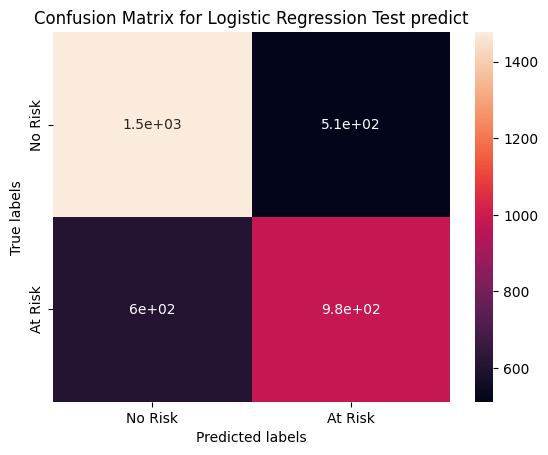

In [ ]:
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[361 132]
 [181 220]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

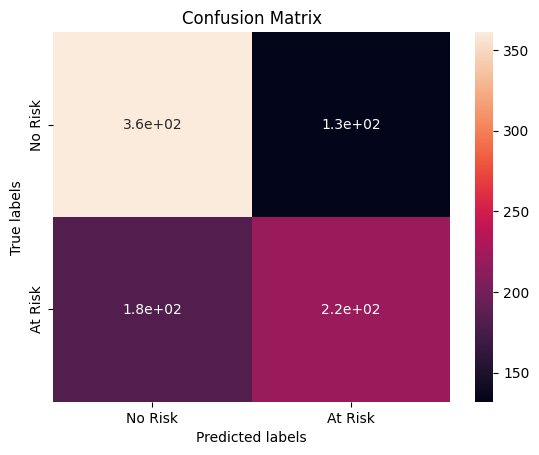

In [ ]:
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))
print('Classification Report for Train Set:')
print(classification_report(y_train, train_preds))
print("\nClassification Report for Test Set:")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6404399751129276
Accuracy score: 0.6498881431767338
Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1989
           1       0.66      0.62      0.64      1585

    accuracy                           0.69      3574
   macro avg       0.68      0.68      0.68      3574
weighted avg       0.69      0.69      0.69      3574


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       493
           1       0.62      0.55      0.58       401

    accuracy                           0.65       894
   macro avg       0.65      0.64      0.64       894
weighted avg       0.65      0.65      0.65       894

